# Chapter 5 Penalized regressions and sparse hedging for minimum variance portfolios

In [11]:
# Third-party imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [8]:
# Load data
DATA_PATH = "../data/data_ml.csv"
data_ml = pd.read_csv(DATA_PATH)
data_ml['date'] = pd.to_datetime(data_ml['date'])

In [9]:
# Copy-paste from notebook 1 for features
features=list(data_ml.iloc[:,3:95].columns) # Keep the features' column names
features_short =["Div_Yld", "Eps", "Mkt_Cap_12M_Usd", "Mom_11M_Usd", 
                    "Ocf", "Pb", "Vol1Y_Usd"]

## 5.1 Penalized regressions
### 5.1.3 Illustrations

In [10]:
y_penalized = data_ml['R1M_Usd'].values # Dependent variable
X_penalized = data_ml[features].values # Predictors
alphas = np.arange(1e-4,1.0e-3,1e-5) # here alpha is used for lambda in scikit-learn
lasso_res = {} # declaring the dict that will receive the model's result 

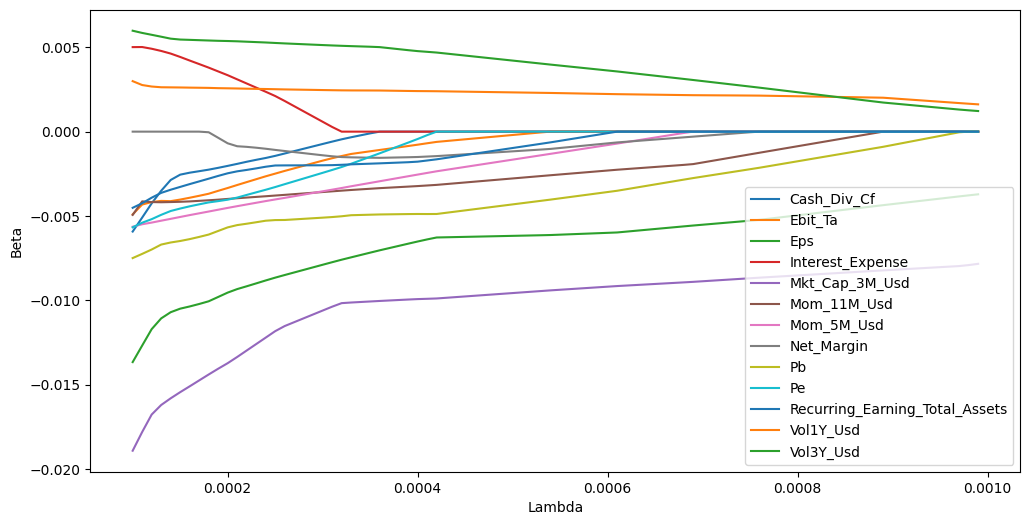

In [21]:
if df_lasso_res.empty:
  for alpha in alphas: # looping through the different alphas/lambdas values
    lasso = Lasso(alpha=alpha) # model
    lasso.fit(X_penalized,y_penalized) 
    lasso_res[alpha] = lasso.coef_ # extract LASSO coefs

  df_lasso_res = pd.DataFrame.from_dict(lasso_res).T # transpose the dataframe for plotting
  df_lasso_res.columns = features # adding the names of the factors
  predictors = (df_lasso_res.abs().sum() > 0.05) # selecting the most relevant

df_lasso_res.loc[:,predictors].plot(xlabel='Lambda',ylabel='Beta',figsize=(12,6)); # plotting

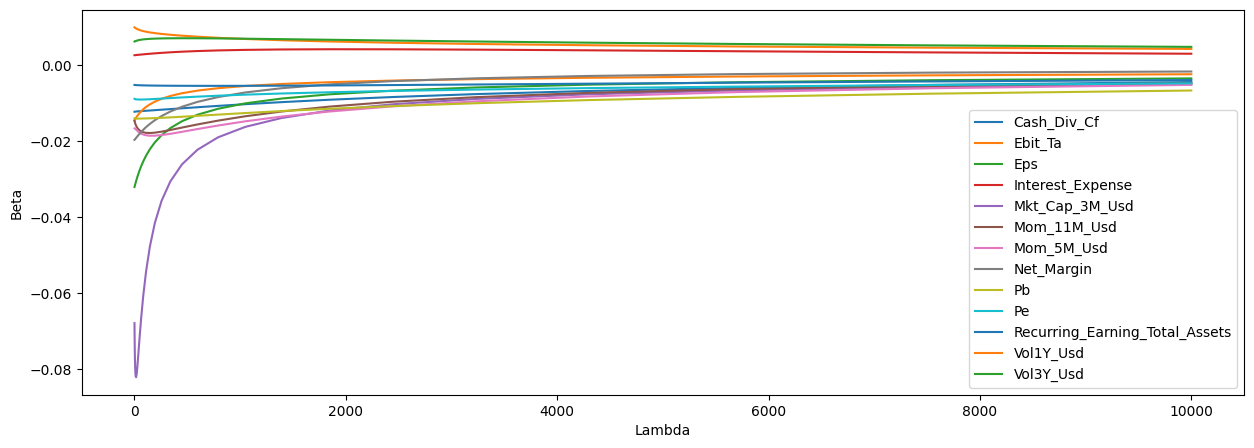

In [23]:
n_alphas = 50 # declare the number of alphas for ridge
alphas = np.logspace(-2, 4, n_alphas) # transforming into log for Aspect ratio 
ridge_res = {} # declaring the dict that will receive the model's result 

for alpha in alphas: # looping through the different alphas/lambdas values
  ridge = Ridge(alpha=alpha) # model
  ridge.fit(X_penalized,y_penalized) # fit the model
  ridge_res[alpha] = ridge.coef_ # extract RIDGE coefs

df_ridge_res = pd.DataFrame.from_dict(ridge_res).T # transpose the dataframe for plotting
df_ridge_res.columns = features # adding the names of the factors
df_ridge_res.loc[:,predictors].plot(xlabel='Lambda',ylabel='Beta',figsize=(15,5)); # Plot!